# ISE 529 Midterm 
## Siyu Mao

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Question1

In [3]:
users = pd.read_csv('users.dat.csv',sep='::', engine='python', header=None)
ratings = pd.read_csv('ratings.dat.csv',sep='::', engine='python', header=None)
movies =  pd.read_csv('movies.dat.csv',sep='::',engine='python', header=None)

In [4]:
user = pd.DataFrame()
user['UserID'] = users.iloc[:,0]
user['Gender'] = users.iloc[:,1]
user['Age'] = users.iloc[:,2]
user['Occupation'] = users.iloc[:,3]
user['Zip-code'] = users.iloc[:,4]

In [5]:
rating = pd.DataFrame()
rating['UserID'] = ratings.iloc[:,0]
rating['MoviesID'] = ratings.iloc[:,1]
rating['Rating'] = ratings.iloc[:,2]
rating['Timestamp'] = ratings.iloc[:,3]

In [6]:
movie = pd.DataFrame()
movie['MoviesID'] = movies.iloc[:,0]
set_1 = movies.iloc[:,1]
movie['Title'] = set_1.str[:-6]
movie['Year'] = set_1.str[-6:].str.replace(')','').str.replace('(','').astype(np.int64)
movie['Genres'] = movies.iloc[:,2]
movie['MoviesID'] = movie['MoviesID'].str.replace('"', '').astype(np.int64)

In [7]:
df = pd.merge(pd.merge(rating, user), movie)
df[:5]

,UserID,MoviesID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Year,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,1975,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,1975,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,1975,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,1975,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,1975,Drama


In [8]:
# a)

In [9]:
Avg = []
M_ID = []
a_df = df[['UserID','Gender', 'Rating', 'MoviesID','Title']]
a_df = a_df[a_df.Gender == 'M']
len(a_df.MoviesID.unique())
for i in range(0, len(a_df.MoviesID.unique())):
    new = a_df[a_df.MoviesID == a_df.MoviesID.unique()[i]]
    M_ID.append(new.MoviesID.unique())
    Avg.append(statistics.mean(new.Rating))

In [10]:
Avg_M = pd.DataFrame()
Avg_M['Avg'] = Avg
Avg_M['M_ID'] = M_ID
Avg_M['M_ID'] = Avg_M['M_ID'].astype(np.int64)
Avg_M['Gender'] = 'M'
best_rating = Avg_M[Avg_M.Avg == max(Avg_M['Avg'])]
best_rating

,Avg,M_ID,Gender
1805,5.0,3280,M
2562,5.0,787,M
3440,5.0,985,M
3482,5.0,3517,M
3565,5.0,989,M
3583,5.0,130,M
3595,5.0,1830,M
3613,5.0,3233,M
3616,5.0,3172,M
3654,5.0,439,M


In [11]:
# b)

In [12]:
unique_m_n = df.MoviesID.unique()
length_b = []
Movies_ID = []
Title = []
for i in range(0, len(df.MoviesID.unique())):
    new_2 = df[df.MoviesID == df.MoviesID.unique()[i]]
    length_b.append(len(new_2))
    Movies_ID.append(new_2.MoviesID.unique())
    Title.append(new_2.Title.unique())

In [13]:
Largest_M = pd.DataFrame()
Largest_M['Movies_ID'] = Movies_ID
Largest_M['num_rating'] = length_b
Largest_M['Title'] = Title
Largest_M['Movies_ID'] = Largest_M['Movies_ID'].astype(np.int64)
new_largest_five = Largest_M.sort_values('num_rating',ascending=False)[:5]
new_largest_five.Title

104                                   [American Beauty ]
44                 [Star Wars: Episode IV - A New Hope ]
124    [Star Wars: Episode V - The Empire Strikes Back ]
64         [Star Wars: Episode VI - Return of the Jedi ]
113                                     [Jurassic Park ]
Name: Title, dtype: object

In [14]:
# c)

In [15]:
rating_l_250 = Largest_M[Largest_M['num_rating'] >= 250]
avg_rating = []
Movie_id = []
Movie_title = []
for i in range(0, len(rating_l_250['Movies_ID'])):
    z = rating_l_250.Movies_ID.unique()[i]
    new_3 = df[df['MoviesID'] == z]
    avg_rating.append(statistics.mean(new_3.Rating))
    Movie_id.append(new_3.MoviesID.unique())
    Movie_title.append(new_3.Title.unique())

In [16]:
df_c = pd.DataFrame()
df_c['Movies_ID'] = Movie_id
df_c['Movies_ID'] = df_c['Movies_ID'].astype(np.int64)
df_c['avg_rating'] = avg_rating
df_c['Movie_title'] = Movie_title
best_c = df_c[df_c['avg_rating'] == max(df_c['avg_rating'])]
best_c

,Movies_ID,avg_rating,Movie_title
830,2019,4.56051,[Seven Samurai (The Magnificent Seven) (Shichi...


In [17]:
# d)

In [18]:
d_df = df[['UserID','Gender', 'Rating', 'MoviesID','Title','Year']]
d_df = d_df[d_df.Gender == 'F']
d_df = d_df[d_df['Year'] >= 1995]
d_df = d_df[d_df['Year'] <= 2000]
hight_F_rating = d_df
Rating_avg = []
MoviesID_d = []
Title_d = []
for i in range(0, len(hight_F_rating.MoviesID.unique())):
    z = hight_F_rating.MoviesID.unique()[i]
    new_d = df[df['MoviesID'] == z]
    Rating_avg.append(statistics.mean(new_d.Rating))
    MoviesID_d.append(new_d.MoviesID.unique())
    Title_d.append(new_d.Title.unique())

In [19]:
len(MoviesID_d)
len(Rating_avg)
len(Title_d)

1549

In [20]:
df_d = pd.DataFrame()
df_d['Rating_avg'] = Rating_avg
df_d['MoviesID_d'] = MoviesID_d
df_d['MoviesID_d'] = df_d['MoviesID_d'].astype(np.int64)
df_d['Title_d'] = Title_d
hightest_rating_women_year = df_d[df_d['Rating_avg'] == max(df_d['Rating_avg'])]
hightest_rating_women_year

,Rating_avg,MoviesID_d,Title_d
1038,5.0,787,"[Gate of Heavenly Peace, The ]"
1525,5.0,3881,[Bittersweet Motel ]


In [21]:
# e)

In [22]:
Avg_w = []
M_ID_w = []
e_df = df[['UserID','Gender', 'Rating', 'MoviesID','Title']]
e_df = e_df[e_df.Gender == 'F']
for i in range(0, len(e_df.MoviesID.unique())):
    new_e = e_df[e_df.MoviesID == e_df.MoviesID.unique()[i]]
    M_ID_w.append(new_e.MoviesID.unique())
    Avg_w.append(statistics.mean(new_e.Rating))

In [23]:
Avg_W = pd.DataFrame()
Avg_W['Avg_w'] = Avg_w
Avg_W['M_ID'] = M_ID_w
Avg_W['M_ID'] = Avg_W['M_ID'].astype(np.int64)
Avg_W['Gender_F'] = 'F'

In [24]:
Avg_e = pd.merge(Avg_M, Avg_W)
Avg_e['G_d'] = abs(Avg_e['Avg']-Avg_e['Avg_w'])
Largest_d = Avg_e[Avg_e['G_d'] == max(Avg_e['G_d'])]
Largest_d

,Avg,M_ID,Gender,Avg_w,Gender_F,G_d
3328,4.333333,682,M,1.0,F,3.333333


In [25]:
# f)

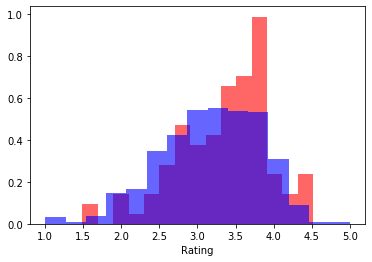

In [26]:
Ani = df[df['Genres'].str.contains('Animation')]
Comedy = df[df['Genres'].str.contains('Comedy')]
Rate_Ani = Ani.groupby('MoviesID')['Rating'].mean()
Rate_Comedy = Comedy.groupby('MoviesID')['Rating'].mean()
plt.hist(Rate_Ani, bins = 15, alpha = 0.6, color = 'r', density = True)
plt.hist(Rate_Comedy, bins = 15, alpha = 0.6, color = 'b', density = True)
plt.xlabel('Rating')
plt.show()

In [27]:
# g)

In [28]:
Ani = df[df['Genres'].str.contains('Animation')]
Comedy = df[df['Genres'].str.contains('Comedy')]
Action = df[df['Genres'].str.contains('Action')]
Adventure = df[df['Genres'].str.contains('Adventure')]
Children = df[df['Genres'].str.contains('Children')]
Crime = df[df['Genres'].str.contains('Crime')]
Documentary = df[df['Genres'].str.contains('Documentary')]
Drama = df[df['Genres'].str.contains('Drama')]
Fantasy = df[df['Genres'].str.contains('Fantasy')]
Film_Noir = df[df['Genres'].str.contains('Film-Noir')]
Horror = df[df['Genres'].str.contains('Horror')]
Musical = df[df['Genres'].str.contains('Musical')]
Mystery = df[df['Genres'].str.contains('Mystery')]
Romance = df[df['Genres'].str.contains('Romance')]
Sci_Fi = df[df['Genres'].str.contains('Sci-Fi')]
Thriller = df[df['Genres'].str.contains('Thriller')]
War = df[df['Genres'].str.contains('War')]
Western = df[df['Genres'].str.contains('Western')]

In [38]:
df_g = pd.DataFrame()
df_g['Avg_Ani'] = Ani.groupby('Year')['Rating'].mean()
df_g['Avg_Comedy'] = Comedy.groupby('Year')['Rating'].mean()
df_g['Avg_Action'] = Action.groupby('Year')['Rating'].mean()
df_g['Avg_Adventure'] = Adventure.groupby('Year')['Rating'].mean()
df_g['Avg_Children'] = Children.groupby('Year')['Rating'].mean()
df_g['Avg_Crime'] = Crime.groupby('Year')['Rating'].mean()
df_g['Avg_Documentary'] = Documentary.groupby('Year')['Rating'].mean()
df_g['Avg_Drama'] = Drama.groupby('Year')['Rating'].mean()
df_g['Avg_Fantasy'] = Fantasy.groupby('Year')['Rating'].mean()
df_g['Avg_Film_Noir'] = Film_Noir.groupby('Year')['Rating'].mean()
df_g['Avg_Horror'] = Horror.groupby('Year')['Rating'].mean()
df_g['Avg_Musical'] = Musical.groupby('Year')['Rating'].mean()
df_g['Avg_Mystery'] = Mystery.groupby('Year')['Rating'].mean()
df_g['Avg_Romance'] = Romance.groupby('Year')['Rating'].mean()
df_g['Avg_Sci_Fi'] = Sci_Fi.groupby('Year')['Rating'].mean()
df_g['Avg_Thriller'] = Thriller.groupby('Year')['Rating'].mean()
df_g['Avg_War'] = War.groupby('Year')['Rating'].mean()
df_g['Avg_Western'] = Western.groupby('Year')['Rating'].mean()

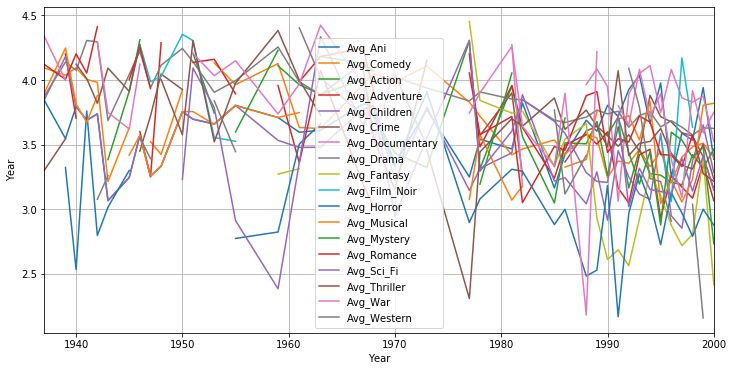

In [40]:
df_g.plot(figsize = (12,6))
plt.ylabel('Year')
plt.grid()

# Question2

In [98]:
df = pd.read_csv('cars93.csv')

In [122]:
df_2 = df.drop(columns=['Manufacturer', 'Model', 'Min.Price', 'Max.Price', 'Make'])

In [129]:
dataframe1 = df_2.dropna(subset=['Rear.seat.room'])
dataframe1.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [79]:
# a)

In [127]:
dataframe2 = dataframe1.dropna()
dataframe2['Cylinders'] = dataframe2['Cylinders'].astype('int64')
L1 = pd.get_dummies(dataframe2,drop_first = True)

C:\Users\siyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [237]:
X0 = L1.iloc[:,1:]
X0.head()

,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Type_Large,Type_Midsize,Type_Small,Type_Sporty,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,25,31,4,1.8,140,6300,2890,13.2,5,177,...,0,0,1,0,0,1,1,0,1,1
1,18,25,6,3.2,200,5500,2335,18.0,5,195,...,0,1,0,0,0,0,1,0,1,1
2,20,26,6,2.8,172,5500,2280,16.9,5,180,...,0,0,0,0,1,0,1,0,1,1
3,19,26,6,2.8,172,5500,2535,21.1,6,193,...,0,1,0,0,0,0,1,0,1,1
4,22,30,4,3.5,208,5700,2545,21.1,4,186,...,0,1,0,0,1,0,0,1,1,1


In [142]:
price_no_nan = L1['Price']
price_no_nan = np.array(price_no_nan).reshape(-1,1)

In [247]:
model_a1 = sm.OLS(price_no_nan,X0).fit()
model_a1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              58.67
Date:                Sat, 19 Oct 2019   Prob (F-statistic):                    8.73e-32
Time:                        23:33:07   Log-Likelihood:                         -231.25
No. Observations:                  82   AIC:                                      514.5
Df Residuals:                      56   BIC:                                      577.1
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
MPG.city               -0.3493      0.441     -0.792      0.432      -1.233       0.535
MPG.highway             0.1791      0.425      0.421      0.675      -0.673       1.031
Cylinders               2.5868      1.190      2.174      0.034       0.203       4.971
EngineSize             -0.7014      2.896     -0.242      0.809      -6.502       5.099
Horsepower              0.1039      0.046      2.265      0.027       0.012       0.196
RPM                    -0.0001      0.002     -0.055      0.956      -0.005       0.004
Rev.per.mile            0.0034      0.002      1.529      0.132      -0.001       0.008
Fuel.tank.capacity      0.1062      0.549      0.194      0.847      -0.993       1.205
Passengers              2.4000      1.855      1.294      0.201      -1.316       6.116
Length                 -0.0671      0.124     -0.543      0.589      -0.315       0.180
Wheelbase               0.8117      0.289      2.807      0.007       0.232       1.391
Width                  -1.2084      0.483     -2.504      0.015      -2.175      -0.242
Turn.circle            -0.2937      0.399     -0.737      0.464      -1.092       0.505
Rear.seat.room          0.3651      0.418      0.874      0.386      -0.472       1.202
Luggage.room            0.1361      0.357      0.381      0.704      -0.579       0.851
Weight                 -0.0036      0.006     -0.579      0.565      -0.016       0.009
Type_Large             -3.6674      3.285     -1.116      0.269     -10.249       2.914
Type_Midsize            2.6430      2.265      1.167      0.248      -1.895       7.181
Type_Small              0.2340      2.778      0.084      0.933      -5.330       5.798
Type_Sporty             5.1111      3.198      1.598      0.116      -1.296      11.518
AirBags_Driver only    -1.8799      1.614     -1.165      0.249      -5.113       1.353
AirBags_None           -6.1793      2.000     -3.090      0.003     -10.185      -2.173
DriveTrain_Front       -1.9275      2.762     -0.698      0.488      -7.460       3.605
DriveTrain_Rear         3.4863      3.282      1.062      0.293      -3.089      10.061
Man.trans.avail_Yes    -1.0510      2.377     -0.442      0.660      -5.814       3.712
Origin_non-USA          1.8042      1.730      1.043      0.301      -1.661       5.269
==============================================================================
Omnibus:                       22.850   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.631
Skew:                           0.993   Prob(JB):                     1.23e-10
Kurtosis:                       6.067   Cond. No.                     5.29e+04
=====================================

In [248]:
model_a1.aic

514.4950608338999

In [149]:
# b)

In [153]:
X0_b = X0.drop(columns=['Type_Large', 'Type_Midsize', 'Type_Small', 'Type_Sporty','Luggage.room'])

In [160]:
Y_b = X0['Luggage.room']

In [157]:
model_b1 = sm.OLS(Y_b,X0_b).fit()
model_b1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Luggage.room   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              242.3
Date:                Sat, 19 Oct 2019   Prob (F-statistic):                    7.67e-51
Time:                        22:35:08   Log-Likelihood:                         -152.08
No. Observations:                  82   AIC:                                      346.2
Df Residuals:                      61   BIC:                                      396.7
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
MPG.city               -0.2266      0.154     -1.468      0.147      -0.535       0.082
MPG.highway             0.3369      0.148      2.272      0.027       0.040       0.633
Cylinders               0.5509      0.408      1.350      0.182      -0.265       1.367
EngineSize             -0.4360      0.968     -0.451      0.654      -2.371       1.499
Horsepower             -0.0164      0.016     -1.021      0.311      -0.048       0.016
RPM                    -0.0009      0.001     -1.239      0.220      -0.002       0.001
Rev.per.mile        -9.305e-05      0.001     -0.117      0.908      -0.002       0.002
Fuel.tank.capacity      0.4069      0.179      2.274      0.027       0.049       0.765
Passengers              0.3982      0.584      0.682      0.498      -0.769       1.565
Length                 -0.0130      0.044     -0.295      0.769      -0.102       0.075
Wheelbase              -0.0172      0.099     -0.173      0.863      -0.216       0.181
Width                   0.0482      0.150      0.322      0.749      -0.251       0.347
Turn.circle            -0.1587      0.139     -1.140      0.259      -0.437       0.120
Rear.seat.room          0.2752      0.144      1.916      0.060      -0.012       0.563
Weight                  0.0020      0.002      0.909      0.367      -0.002       0.006
AirBags_Driver only     0.5041      0.583      0.864      0.391      -0.662       1.670
AirBags_None            0.2061      0.709      0.291      0.772      -1.212       1.624
DriveTrain_Front        0.3866      0.959      0.403      0.688      -1.532       2.305
DriveTrain_Rear         0.0422      1.174      0.036      0.971      -2.305       2.389
Man.trans.avail_Yes    -0.6704      0.741     -0.905      0.369      -2.152       0.811
Origin_non-USA         -0.4471      0.624     -0.717      0.476      -1.695       0.801
==============================================================================
Omnibus:                       14.506   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.587
Skew:                           0.575   Prob(JB):                     3.76e-07
Kurtosis:                       5.708   Cond. No.                     4.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
dataframe3 = dataframe1.drop(columns=['Price','Type'])
dataframe3['Cylinders'] = dataframe3['Cylinders'].astype('int64')
L2 = pd.get_dummies(dataframe3,drop_first = True)
L2 = L2[L2['Luggage.room'].isnull()]
L2 = L2.drop(columns = ['Luggage.room'])
X1 = L2

In [203]:
Nan_value = model_b1.predict(X1)
Nan_value

15    17.527062
16    22.384290
25    16.690229
35    17.084455
55    16.978060
65    18.016493
69    17.318307
86    17.211210
88    19.693328
dtype: float64

In [235]:
dataframe1['Luggage.room'] = dataframe1['Luggage.room'].replace(to_replace = np.nan, value = Nan_value)
dataframe3 = dataframe1
dataframe3[:5]

C:\Users\siyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [236]:
# c)

In [252]:
dataframe3['Cylinders'] = dataframe3['Cylinders'].astype('int64')
L3 = pd.get_dummies(dataframe3,drop_first = True)
X2 = L3.iloc[:,1:]
X2.head()

C:\Users\siyum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,...,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Man.trans.avail_Yes,Origin_non-USA
0,25,31,4,1.8,140,6300,2890,13.2,5,177,...,0,1,0,0,0,1,1,0,1,1
1,18,25,6,3.2,200,5500,2335,18.0,5,195,...,1,0,0,0,0,0,1,0,1,1
2,20,26,6,2.8,172,5500,2280,16.9,5,180,...,0,0,0,0,1,0,1,0,1,1
3,19,26,6,2.8,172,5500,2535,21.1,6,193,...,1,0,0,0,0,0,1,0,1,1
4,22,30,4,3.5,208,5700,2545,21.1,4,186,...,1,0,0,0,1,0,0,1,1,1


In [255]:
price = L3['Price']
price = np.array(price).reshape(-1,1)

In [254]:
model_c1 = sm.OLS(price,X2).fit()
model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              66.73
Date:                Sat, 19 Oct 2019   Prob (F-statistic):                    3.50e-37
Time:                        23:34:12   Log-Likelihood:                         -254.23
No. Observations:                  91   AIC:                                      562.5
Df Residuals:                      64   BIC:                                      630.3
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
MPG.city               -0.2406      0.414     -0.581      0.563      -1.068       0.587
MPG.highway             0.1335      0.402      0.332      0.741      -0.669       0.936
Cylinders               2.1341      1.051      2.031      0.046       0.035       4.233
EngineSize             -0.3584      2.668     -0.134      0.894      -5.687       4.971
Horsepower              0.1091      0.042      2.599      0.012       0.025       0.193
RPM                    -0.0002      0.002     -0.109      0.913      -0.004       0.004
Rev.per.mile            0.0033      0.002      1.613      0.112      -0.001       0.007
Fuel.tank.capacity      0.0535      0.487      0.110      0.913      -0.919       1.026
Passengers              2.2919      1.754      1.307      0.196      -1.212       5.796
Length                 -0.0186      0.105     -0.177      0.860      -0.229       0.192
Wheelbase               0.6062      0.240      2.526      0.014       0.127       1.086
Width                  -1.0331      0.427     -2.422      0.018      -1.885      -0.181
Turn.circle            -0.3878      0.347     -1.117      0.268      -1.081       0.306
Rear.seat.room          0.3935      0.346      1.136      0.260      -0.299       1.085
Luggage.room            0.1378      0.342      0.403      0.689      -0.546       0.821
Weight                 -0.0025      0.005     -0.485      0.629      -0.013       0.008
Type_Large             -3.9452      3.027     -1.303      0.197      -9.992       2.101
Type_Midsize            2.2883      2.112      1.084      0.283      -1.930       6.507
Type_Small             -0.1402      2.577     -0.054      0.957      -5.288       5.008
Type_Sporty             4.9690      2.962      1.678      0.098      -0.948      10.886
Type_Van               -4.3867      4.596     -0.954      0.343     -13.568       4.795
AirBags_Driver only    -1.9285      1.540     -1.252      0.215      -5.005       1.149
AirBags_None           -5.4882      1.825     -3.008      0.004      -9.134      -1.843
DriveTrain_Front       -0.0238      2.043     -0.012      0.991      -4.105       4.057
DriveTrain_Rear         5.0307      2.807      1.792      0.078      -0.578      10.639
Man.trans.avail_Yes    -1.7429      2.133     -0.817      0.417      -6.004       2.518
Origin_non-USA          2.2130      1.544      1.433      0.157      -0.871       5.297
==============================================================================
Omnibus:                       27.911   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.961
Skew:                           1.056   Prob(JB):                     1.75e-15
Kurtosis:                   

In [256]:
model_c1.aic

562.4675655815313

In [257]:
model_a1.aic

514.4950608338999

In [ ]:
# model_a1 has smallesT AIC value, 
# it is best compare to the model_c1.